In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

In [ ]:
SIZE = 64 #img size

In [ ]:
# Read input images and assign labels based on folder names

train_path = os.path.join("/content/drive/MyDrive/Malware/virus_share_lbp/train/*")

folders = ['adload', 'agent', 'alureon', 'bho', 'ceeinject', 'cycbot', 'delfinject', 'fakerean', 'hotbar', 'lolyda', 'obfuscator', 'onlinegames', 'rbot', 'renos', 'startpage', 'vobfus', 'vundo', 'winwebsec', 'zbot', 'zeroaccess']


#Capture training data and labels into respective lists
train_images = []
train_labels = []

for directory_path in glob.glob(train_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

onlinegames
renos
startpage
vundo
vobfus
zbot
obfuscator
winwebsec
rbot
zeroaccess
delfinject
lolyda
cycbot
bho
ceeinject
hotbar
adload
fakerean
alureon
agent


In [ ]:
print(len(train_images))
print(len(train_labels))

21160
21160


In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/virus_share_lbp/test/*")

folders = ['adload', 'agent', 'alureon', 'bho', 'ceeinject', 'cycbot', 'delfinject', 'fakerean', 'hotbar', 'lolyda', 'obfuscator', 'onlinegames', 'rbot', 'renos', 'startpage', 'vobfus', 'vundo', 'winwebsec', 'zbot', 'zeroaccess']

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
print(len(test_images))
print(len(test_labels))

5292
5292


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)


In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [ ]:
from sklearn.model_selection import train_test_split
x_test1, x_val, y_test1, y_val = train_test_split(x_test, y_test, test_size=0.1, random_state=42)

In [ ]:
###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_val =x_val /255.0

In [ ]:
#One hot encode y values for neural network.
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_val_one_hot=to_categorical(y_val)

In [ ]:
from keras.applications import ResNet50

In [ ]:
#############################
#Load model wothout classifier/fully connected layers
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(SIZE,SIZE,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights

resnet.summary()  #Trainable parameters will be 0


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

# **Fusion Model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Dense, concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

inp_ = layers.Input(shape=(64,64,3))

# Designing two cnn models
cnn11 = layers.Conv2D(64,(3,3),padding = 'same', activation='relu')(inp_)
mxp11 = layers.MaxPooling2D(2,2)(cnn11)

cnn11 = layers.Conv2D(64,(3,3),padding = 'same', activation='relu')(mxp11)
mxp11 = layers.MaxPooling2D(2,2)(cnn11)

cnn11 = layers.Conv2D(64,(3,3),padding = 'same', activation='relu')(mxp11)
mxp11 = layers.MaxPooling2D(2,2)(cnn11)

cnn11 = layers.Flatten()(mxp11)

print(cnn11.shape)

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3))

for layer in resnet.layers:
    layer.trainable = False


resnet_output = resnet(inp_)

resnet11 = Flatten()(resnet_output)

print(resnet11.shape)

(None, 4096)
(None, 8192)


In [ ]:
# Merging the two models
merge_ = layers.concatenate([cnn11, resnet11])
out_p = layers.Dense(224, activation='relu')(merge_)
out_p = layers.Dense(20, activation='softmax')(out_p)
merged_model = keras.Model(inputs=inp_, outputs=out_p, name='merge_')

merged_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
merged_model.summary()

Model: "merge_"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 64, 64, 64)           1792      ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 64)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 32, 32, 64)           36928     ['max_pooling2d_3[0][0]']

In [ ]:
#tranining the model
history = merged_model.fit(x_train, y_train_one_hot, epochs=10,validation_data=(x_test, y_test_one_hot))

Epoch 1/10
662/662 [==============================] - 32s 28ms/step - loss: 1.7270 - accuracy: 0.4867 - val_loss: 0.0601 - val_accuracy: 0.9851
Epoch 2/10
662/662 [==============================] - 15s 23ms/step - loss: 0.0340 - accuracy: 0.9905 - val_loss: 0.0217 - val_accuracy: 0.9940
Epoch 3/10
662/662 [==============================] - 15s 23ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0098 - val_accuracy: 0.9970
Epoch 4/10
662/662 [==============================] - 16s 24ms/step - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.0212 - val_accuracy: 0.9940
Epoch 5/10
662/662 [==============================] - 16s 24ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 6/10
662/662 [==============================] - 16s 24ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0040 - val_accuracy: 0.9989
Epoch 7/10
662/662 [==============================] - 16s 24ms/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.0076 - val_accuracy:

In [ ]:
result = merged_model.evaluate(x_test,y_test_one_hot)

# model loss and accuracy
print("model loss:",result[0])
print("model accuracy",result[1])

166/166 [==============================] - 3s 16ms/step - loss: 0.0083 - accuracy: 0.9979
model loss: 0.00832649227231741
model accuracy 0.9979214072227478


In [ ]:
prediction = merged_model.evaluate(x_test, y_test_one_hot , verbose=0)
print("%s: %.2f%%" % (merged_model.metrics_names[1], prediction[1]*100))


accuracy: 99.79%


In [ ]:
merged_model.save('/content/drive/MyDrive/Malware/Merged_model_64x64_Malhub.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import time

start_time = time.time()
predictions = merged_model.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction time:", prediction_time, "seconds")

166/166 [==============================] - 3s 15ms/step
Prediction time: 4.140939474105835 seconds


1/1 [==============================] - 0s 328ms/step
Prediction time: 0.3675525188446045 seconds
The prediction for this image is:  ['startpage']
The actual label for this image is:  startpage


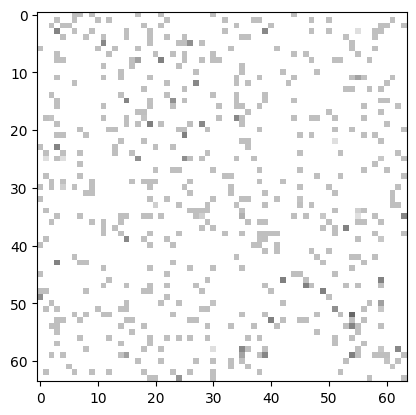

In [ ]:
n=9  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
start_time = time.time()
prediction = np.argmax(merged_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction time:", prediction_time, "seconds")
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.9979213907785336
Macro-Averaged F1 Score: 0.9977633459801414
Accuracy: 0.9979213907785336
Micro-Averaged Precision: 0.9979213907785336
Macro-Averaged Precision: 0.9978174190551377
Micro-Averaged Recall: 0.9979213907785336
Macro-Averaged Recall: 0.9977418272250681


In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
prediction_NN = merged_model.predict(x_test)
# print(prediction_NN)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

166/166 [==============================] - 2s 14ms/step


[[210   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0 169   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0 266   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 236   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 179   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0 205   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 230   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 213   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 299   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 183   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 288   0   0   0   0   0   0   1
    0   0]
 [  0   0   5   0   0   0   0   0   0   0   0 254   0   0   0   0

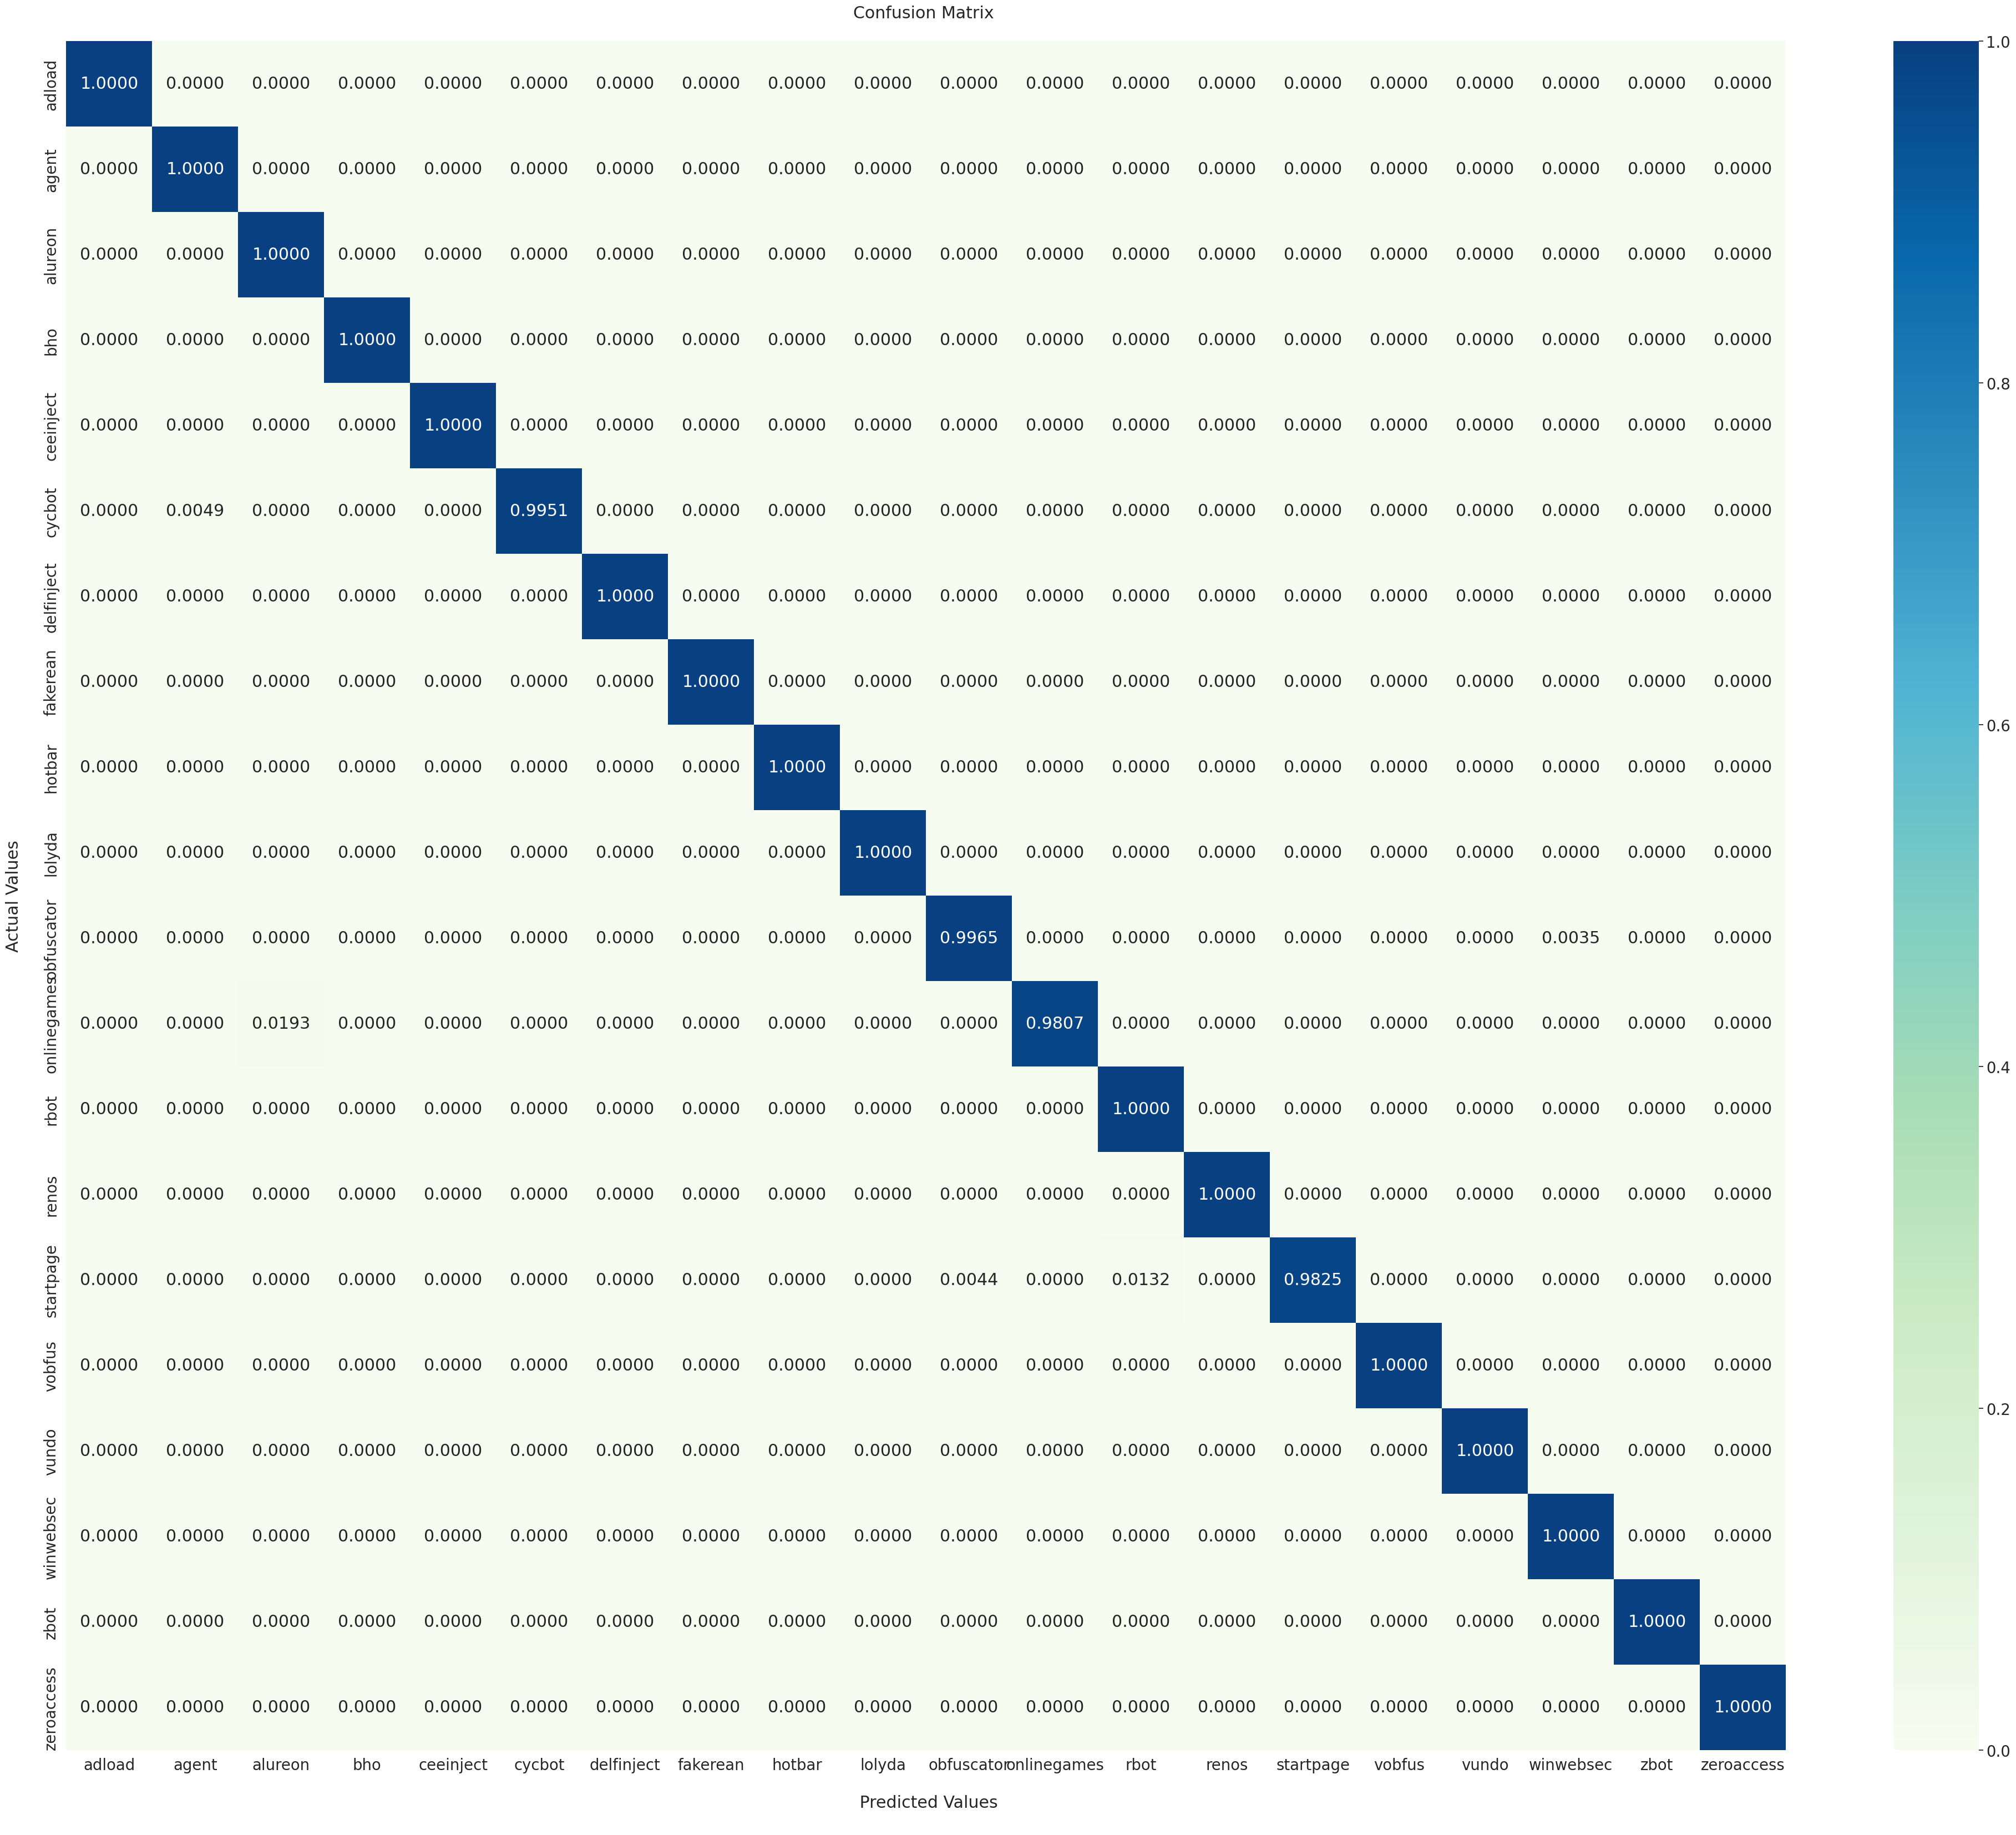

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

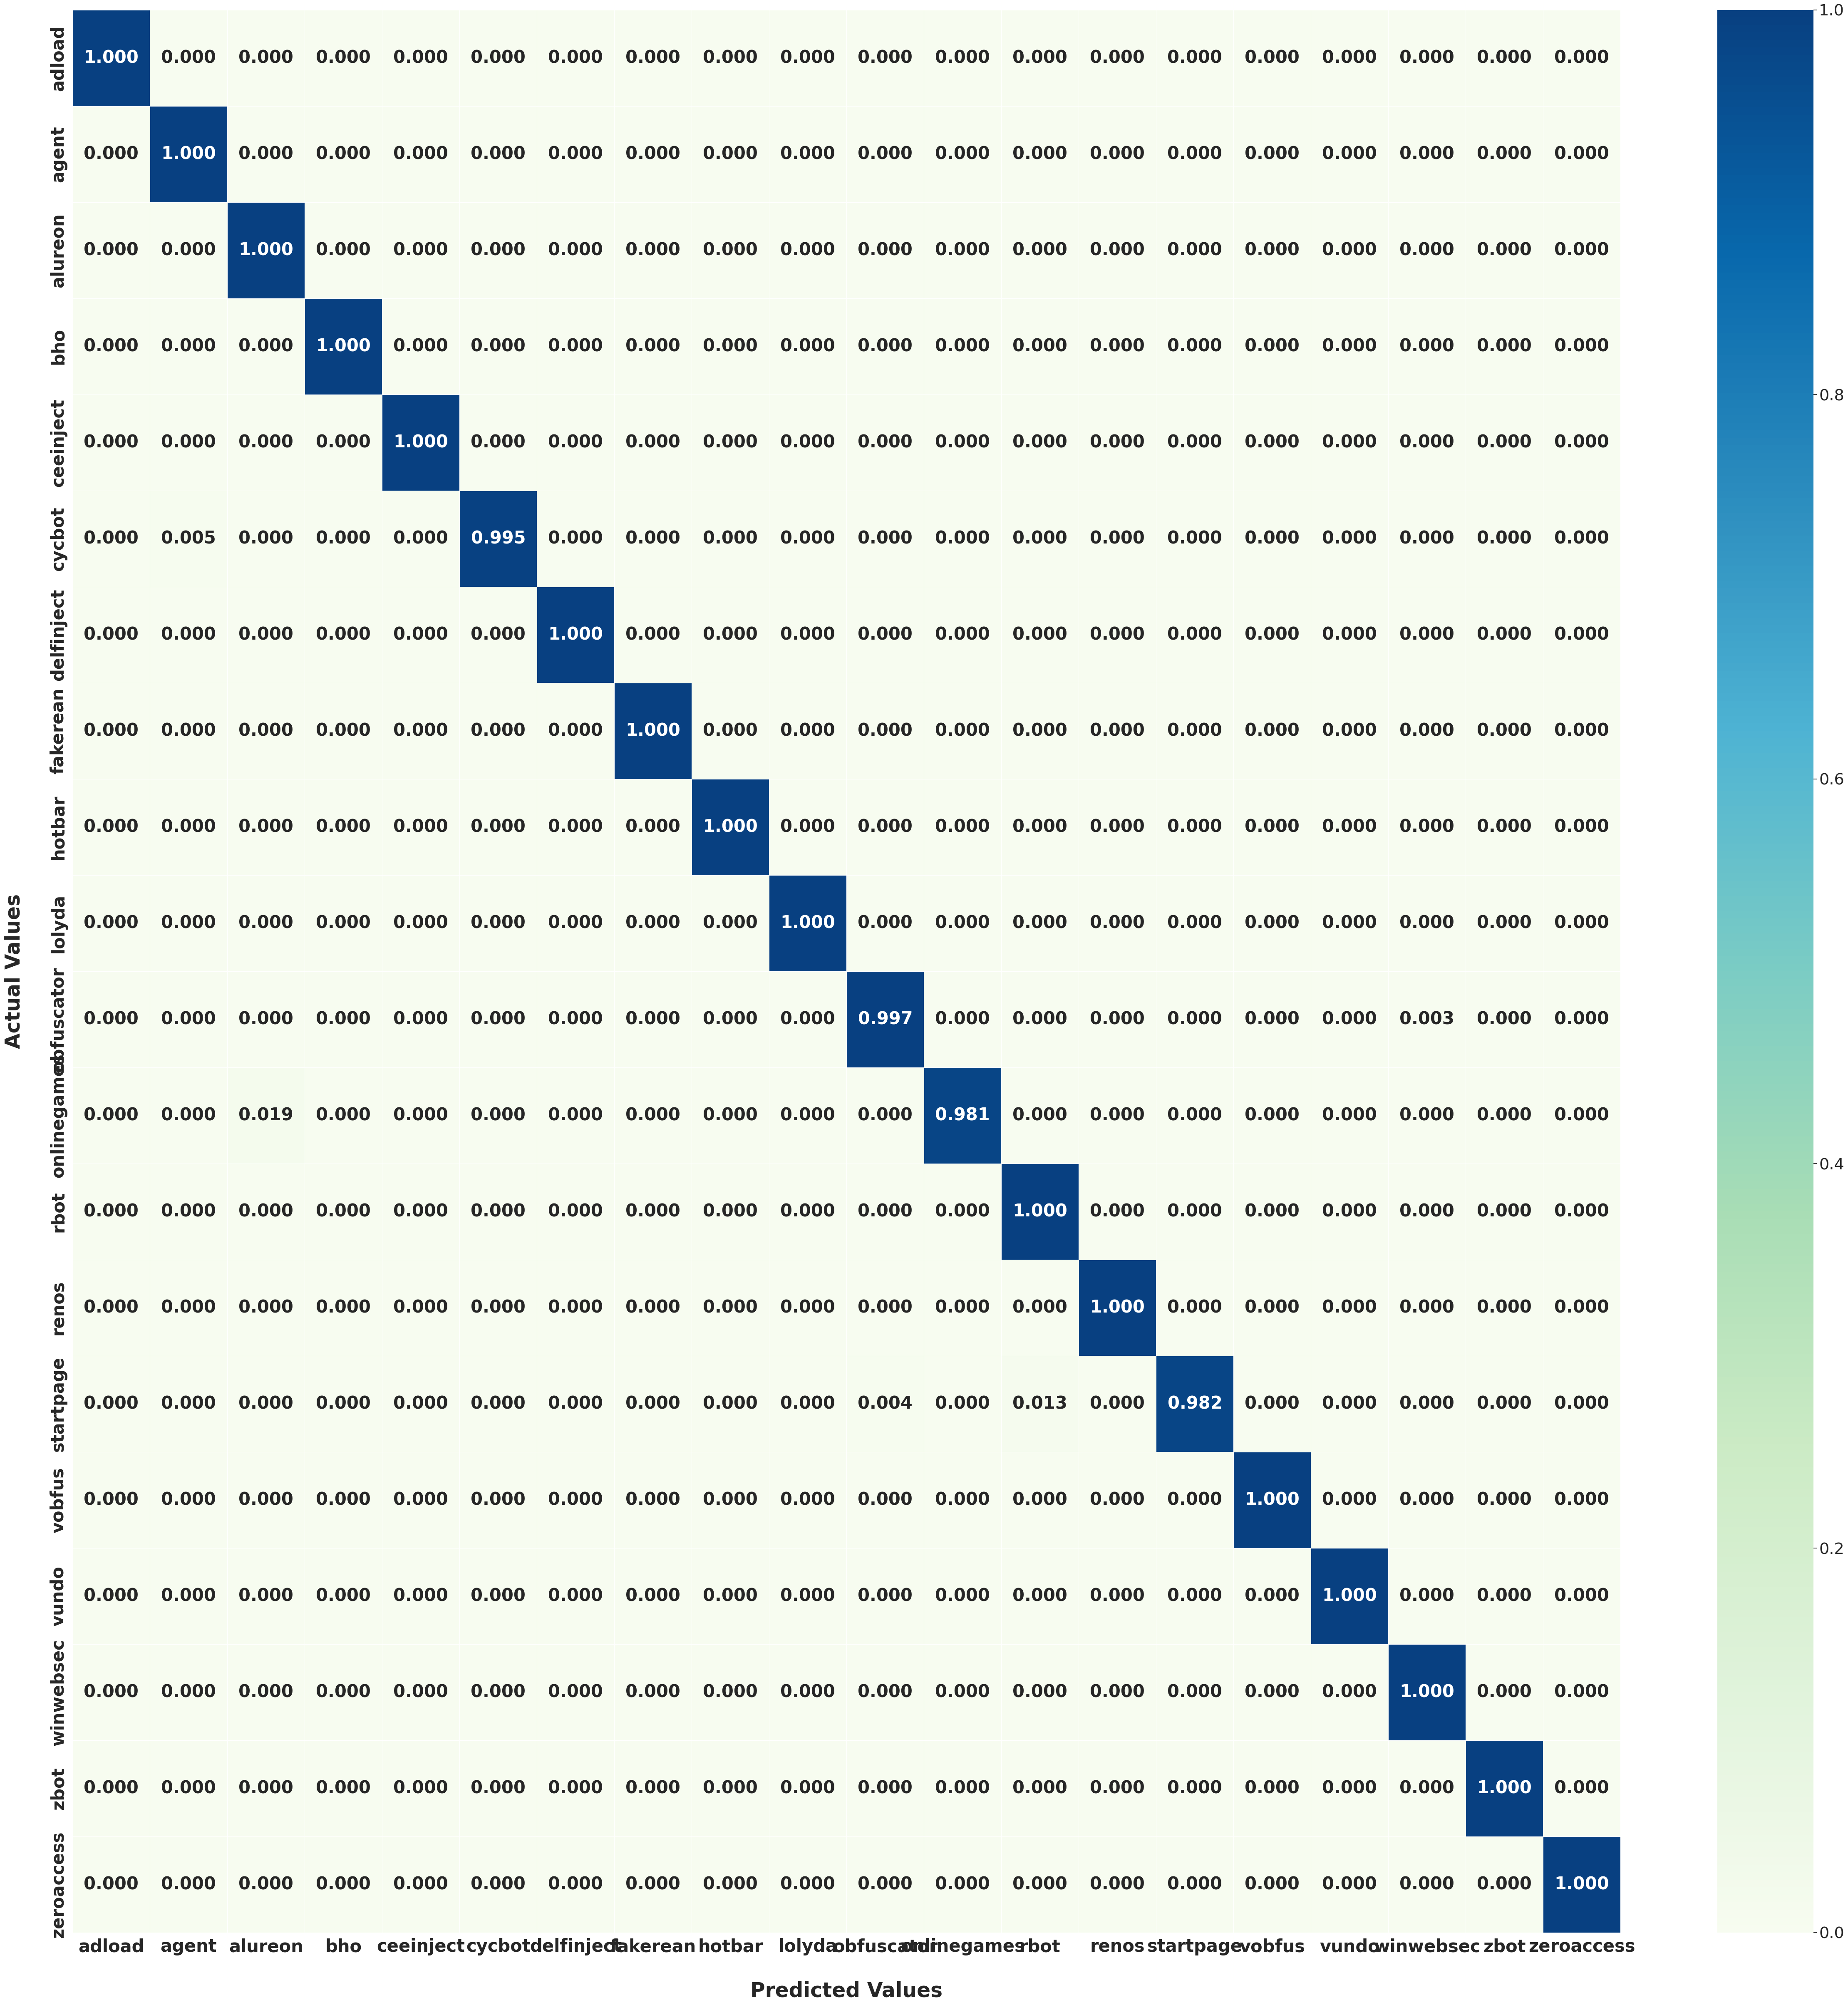

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have defined test_labels, prediction_NN, and folders before this point

# Generate a sample confusion matrix
cm = confusion_matrix(test_labels, prediction_NN, normalize='true')

# Set up the figure size and font scale
plt.figure(figsize=(60, 60))
sns.set(font_scale=2.5)  # Adjust the font size as needed

# Create a heatmap with bold labels
fx = sns.heatmap(cm, annot=True, fmt='.3f', cmap="GnBu", linewidths=.5, annot_kws={"size": 30, "weight": "bold"})

# Set title and axis labels with increased font size
#fx.set_title('Confusion Matrix\n', fontsize=50, fontweight="bold")
fx.set_xlabel('\nPredicted Values', fontsize=35, fontweight="bold")
fx.set_ylabel('Actual Values\n', fontsize=35, fontweight="bold")

# Set tick labels with increased font size and bold style
fx.set_xticklabels(folders, fontsize=30, fontweight="bold")
fx.set_yticklabels(folders, fontsize=30, fontweight="bold")
##fx.xaxis.set_ticklabels(folders)
#fx.yaxis.set_ticklabels(folders)
# Display the plot
plt.show()


## **ResNet50+CNN+2DL-Max pooling**

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, GlobalMaxPooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-18-147ffae1972c>:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    inp_ = Input(shape=(64, 64, 3))
    resnet = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_tensor=inp_)

    model.add(resnet)
    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(GlobalMaxPooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    # Tune hyperparameters
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.add(Dense(20, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner_dir',
    project_name='resnet_tuning'
)

# Define callback to reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Perform the search
tuner.search(x_train, y_train_one_hot, epochs=10, validation_data=(x_val, y_val_one_hot), callbacks=[reduce_lr])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.save('/content/drive/MyDrive/Malware/Tuned_model_ResNet/resnet/64x64_lbp')
print('best hyper parameters:',best_hps)

Reloading Tuner from keras_tuner_dir/resnet_tuning/tuner0.json

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
0.0080411         |0.0077445         |learning_rate



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalMaxPooling2D, Input

In [ ]:
inp_ = Input(shape=(64,64,3))
# Load the pre-trained ResNet50 model

resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=inp_)

# Create model
model_1 = tf.keras.models.Sequential()

# Adding the ResNet50 model to your own model
model_1.add(resnet)

# Adding three convolutional layers
model_1.add(Conv2D(96, (3, 3), padding='same', activation='relu'))

model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Adding Global Average Pooling layer
model_1.add(GlobalMaxPooling2D())

# Adding two dense layers
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))

num_classes = 20
model_1.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 96)          1769568   
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          55360     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          36928     
                                                                 
 global_max_pooling2d (Glob  (None, 64)                0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model_1.fit(x_train, y_train_one_hot, epochs=40,callbacks=[early_stopping], validation_data=(x_test, y_test_one_hot))

Epoch 1/40
662/662 [==============================] - 83s 66ms/step - loss: 0.3563 - accuracy: 0.9090 - val_loss: 3.1848 - val_accuracy: 0.0678
Epoch 2/40
662/662 [==============================] - 42s 63ms/step - loss: 0.0821 - accuracy: 0.9836 - val_loss: 0.7998 - val_accuracy: 0.8454
Epoch 3/40
662/662 [==============================] - 42s 63ms/step - loss: 0.0609 - accuracy: 0.9892 - val_loss: 0.2824 - val_accuracy: 0.9410
Epoch 4/40
662/662 [==============================] - 42s 64ms/step - loss: 0.0827 - accuracy: 0.9876 - val_loss: 2.3954 - val_accuracy: 0.3454
Epoch 5/40
662/662 [==============================] - 42s 64ms/step - loss: 0.0730 - accuracy: 0.9874 - val_loss: 2.1340 - val_accuracy: 0.4286
Epoch 6/40
662/662 [==============================] - 42s 64ms/step - loss: 0.0380 - accuracy: 0.9930 - val_loss: 0.0311 - val_accuracy: 0.9917
Epoch 7/40
662/662 [==============================] - 42s 64ms/step - loss: 0.0781 - accuracy: 0.9844 - val_loss: 0.0179 - val_accuracy:

In [ ]:
model_1.save('/content/drive/MyDrive/Malware/model_64x64_lbp.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predictions = model_1.predict(x_test)

166/166 [==============================] - 3s 14ms/step


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.9973544973544973
Macro-Averaged F1 Score: 0.9971445514891562
Accuracy: 0.9973544973544973
Micro-Averaged Precision: 0.9973544973544973
Macro-Averaged Precision: 0.9972478827592912
Micro-Averaged Recall: 0.9973544973544973
Macro-Averaged Recall: 0.9970676821926128


In [ ]:
import time

start_time = time.time()
prediction_NN = model_1.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction time:", prediction_time, "seconds")

# print(prediction_NN)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

166/166 [==============================] - 2s 14ms/step
Prediction time: 3.1009249687194824 seconds


In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns


[[207   0   0   0   0   0   0   0   0   0   2   1   0   0   0   0   0   0
    0   0]
 [  0 168   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0]
 [  0   0 266   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 236   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 179   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 206   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 228   0   0   0   0   0   0   0   1   1   0   0
    0   0]
 [  0   0   0   0   0   0   0 211   0   0   1   0   0   0   0   0   0   1
    0   0]
 [  0   0   0   0   0   0   0   0 299   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 183   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 289   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 259   0   0   0   0

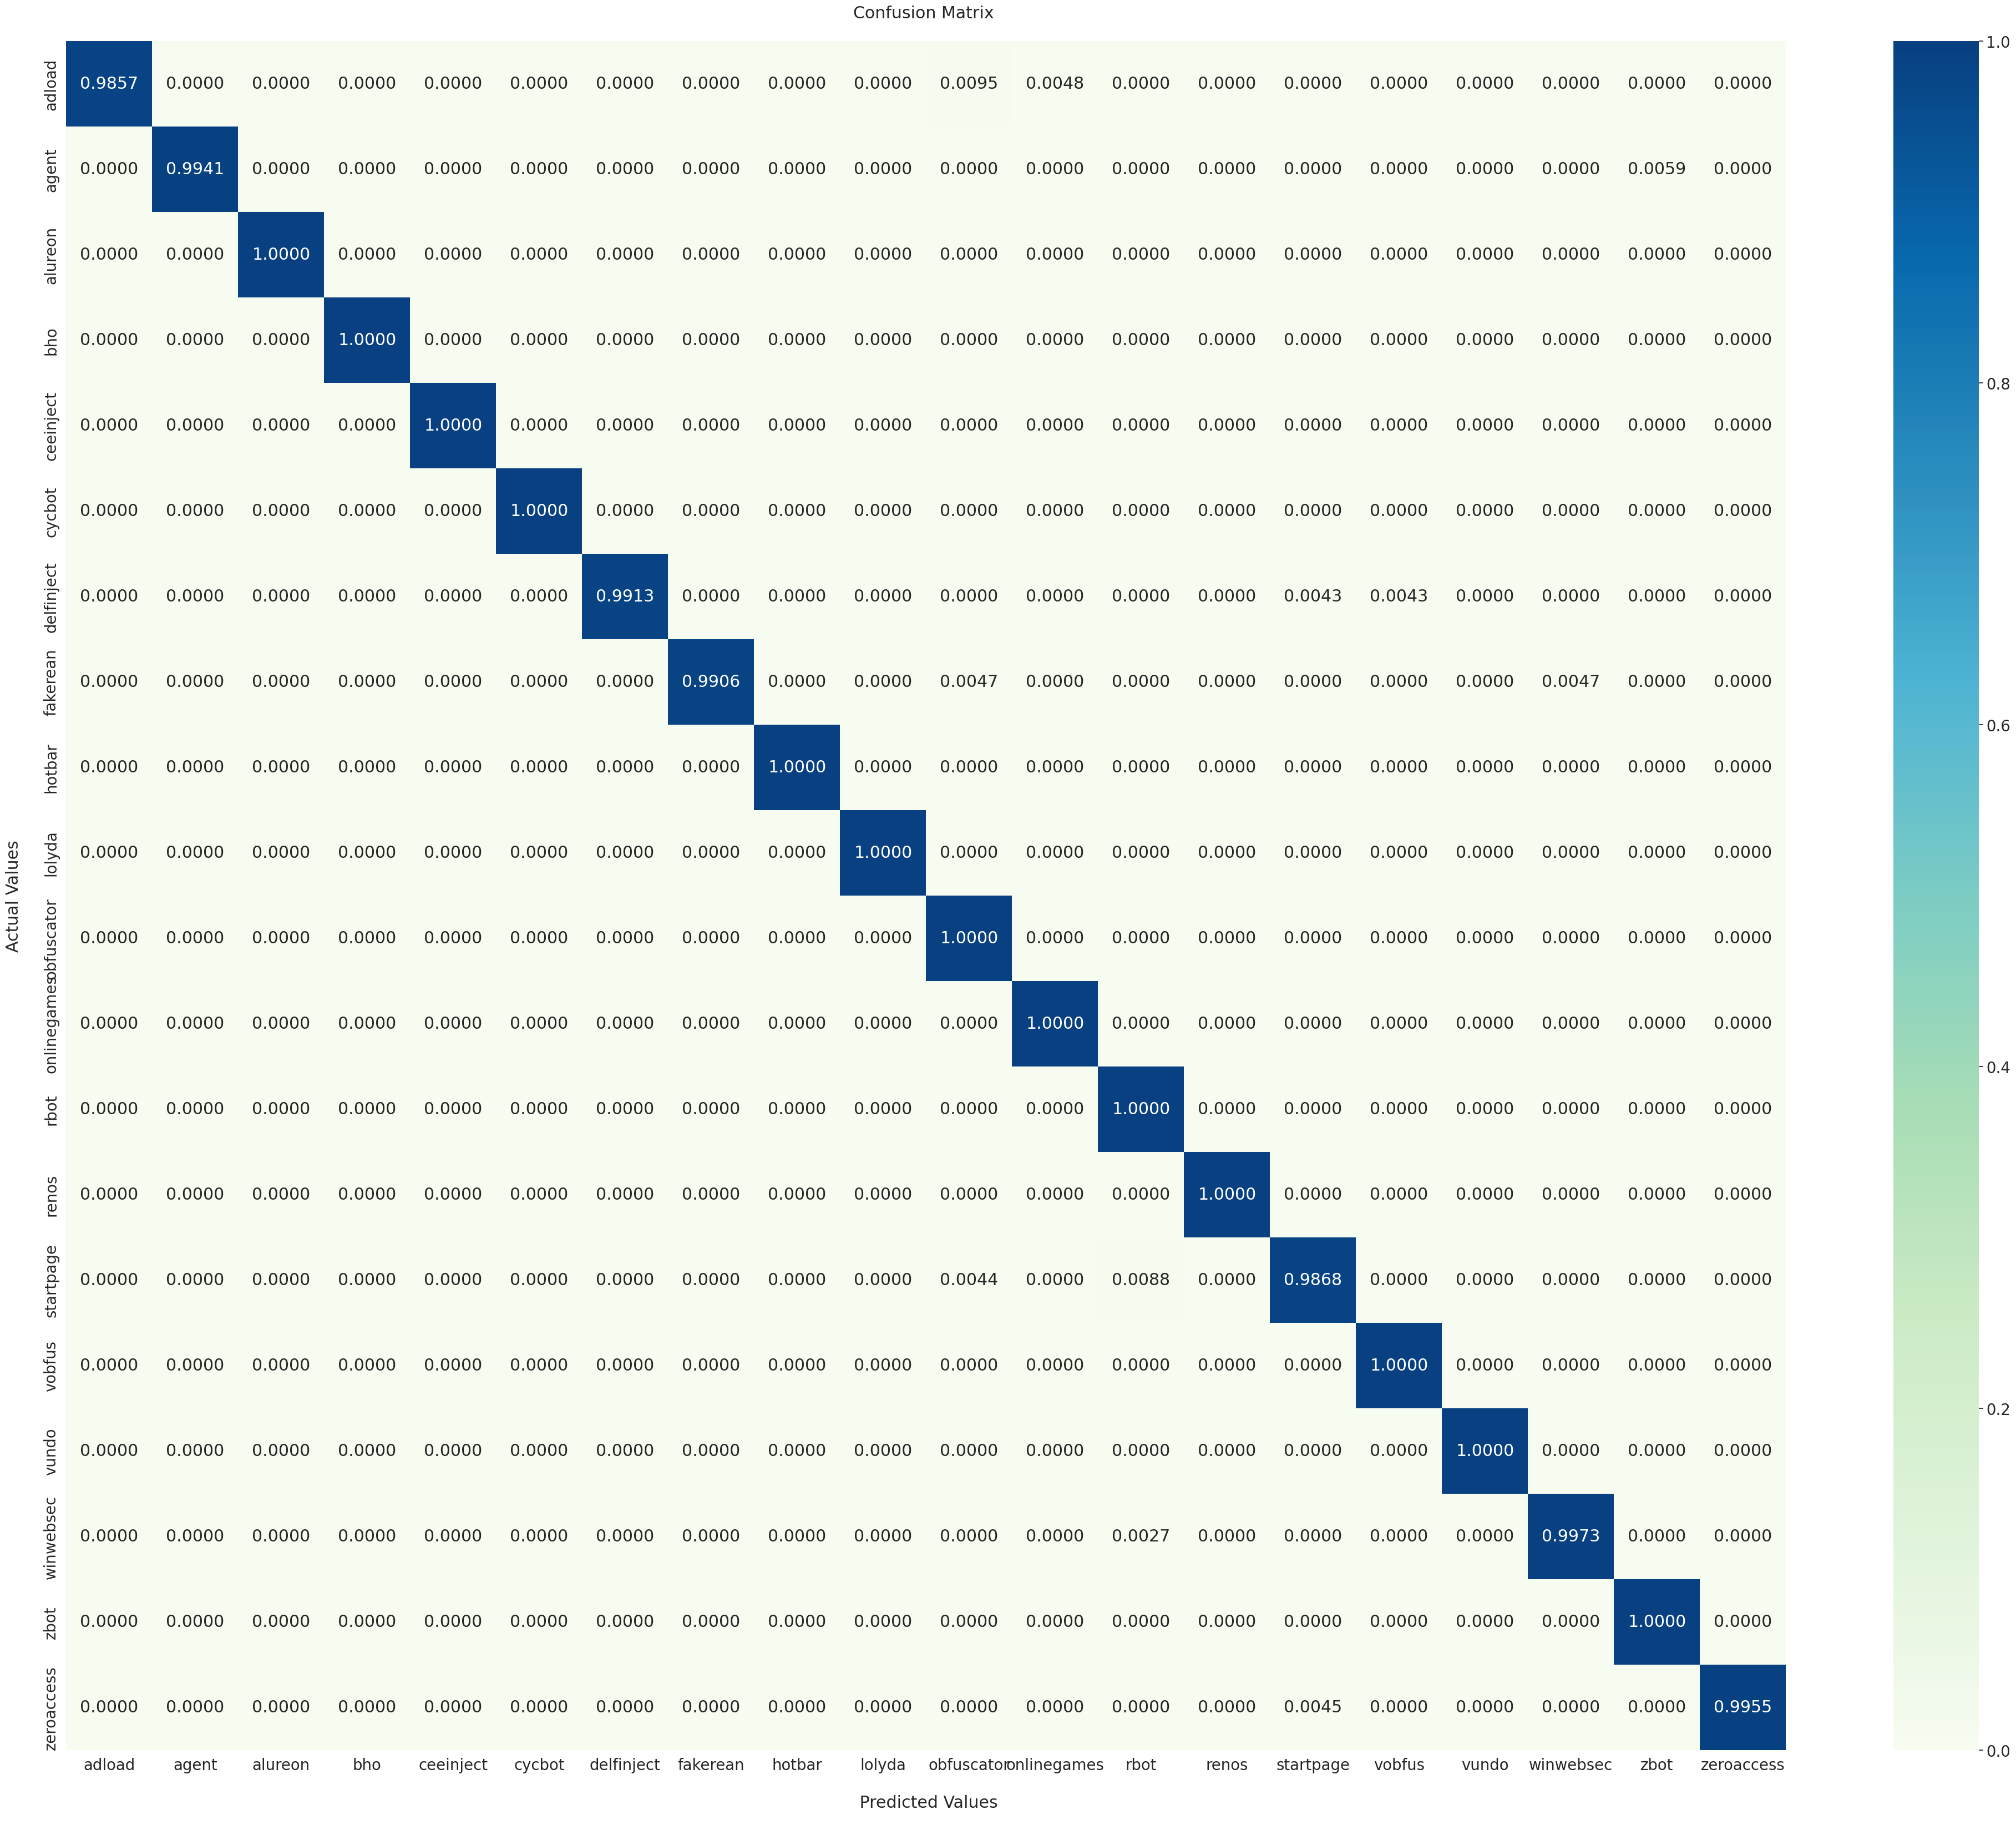

In [ ]:
# Visualizing confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

In [ ]:
plt.figure(figsize=(15, 12))
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
ax = sns.heatmap(cm_normalized, annot=True, fmt='.4f', cmap="GnBu", cbar_kws={'label': 'Percentage'})
ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values', fontweight='bold')
ax.set_ylabel('Actual Values\n', fontweight='bold')
ax.xaxis.set_ticklabels([f'\n{label}' for label in folders], rotation=45, ha='right')
ax.yaxis.set_ticklabels([f'{label}\n' for label in folders], rotation=0)
plt.show()

In [ ]:
n=9  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
start_time = time.time()
prediction = np.argmax(model_1.predict(input_img))  #argmax to convert categorical back to original
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction time:", prediction_time, "seconds")

prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])